In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
df= pd.read_csv('/content/drive/MyDrive/No. of deaths.csv')
df.head()

,Year,No. of deaths
0,1979,361
1,1980,156
2,1981,72
3,1982,16
4,1983,182


In [ ]:
df. describe()


,Year,No. of deaths
count,30.000000,30.000000
mean,1993.500000,302.666667
std,8.803408,408.527493
min,1979.000000,2.000000
25%,1986.250000,61.000000
50%,1993.500000,138.500000
75%,2000.750000,399.250000
max,2008.000000,1662.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           30 non-null     int64
 1   No. of deaths  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [ ]:
df.tail()

,Year,No. of deaths
25,2004,117
26,2005,587
27,2006,135
28,2007,476
29,2008,294


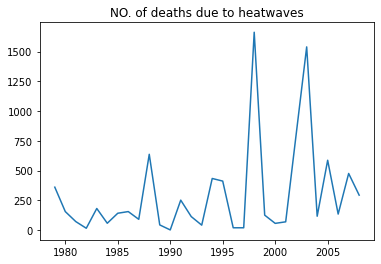

In [ ]:
plt.plot(df['Year'], df['No. of deaths'])
xlabel='Year'
ylabel='No. of deaths'
plt.title('NO. of deaths due to heatwaves')
plt.show()

In [ ]:
pip install --upgrade --user git+https://github.com/pycaret/pycaret.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-q1g8gcf2
  Running command git clone -q https://github.com/pycaret/pycaret.git /tmp/pip-req-build-q1g8gcf2
     |████████████████████████████████| 141 kB 8.2 MB/s 
     |████████████████████████████████| 72 kB 873 kB/s 
     |████████████████████████████████| 2.0 MB 54.0 MB/s 
     |████████████████████████████████| 3.3 MB 48.6 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 280 kB 71.1 MB/s 
     |████████████████████████████████| 11.2 MB 43.8 MB/s 
     |████████████████████████████████| 79.9 MB 1.1 MB/s 
     |████████████████████████████████| 106 kB 69.2 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |█████████████████

In [39]:
# split data into train-test set
train = df[df['Year'] < 2004]
test = df[df['Year'] >= 2004]

# check shape
train.shape, test.shape

((25, 2), (5, 2))

In [41]:
# import the regression module
from pycaret.regression import *

# initialize setup
s = setup(data = train,test_data=test, target = 'No. of deaths', fold_strategy = 'timeseries', numeric_features = ['Year'], fold = 10, transform_target = True, n_jobs=1,session_id = 123)

,Description,Value
0,Session id,123
1,Target,No. of deaths
2,Target type,Regression
3,Data shape,"(30, 2)"
4,Train data shape,"(25, 2)"
5,Test data shape,"(5, 2)"
6,Numeric features,1
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [43]:
best = compare_models(sort = 'RMSE',errors="raise")


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0600
br,Bayesian Ridge,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0250
lasso,Lasso Regression,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370
ridge,Ridge Regression,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0320
en,Elastic Net,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
lar,Least Angle Regression,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270
llar,Lasso Least Angle Regression,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270
par,Passive Aggressive Regressor,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0240
gbr,Gradient Boosting Regressor,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0480


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x7f35fdcf1d40>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x7f35fdcf1830>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7f35fdcf1830>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x7f35fdcf8b90>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


In [44]:
print(best)

LinearRegression(n_jobs=1)


In [45]:
future_dates = pd.date_range(start = '2009', end = '2011', freq = 'MS')
future_df = pd.DataFrame()
future_df['Year'] = [i.year for i in future_dates]    
future_df.head()


,Year
0,2009
1,2009
2,2009
3,2009
4,2009


In [46]:
predictions_future = predict_model(best, data=future_df)
predictions_future.head()


,Year,prediction_label
0,2009.0,6.877499
1,2009.0,6.877499
2,2009.0,6.877499
3,2009.0,6.877499
4,2009.0,6.877499


In [47]:
concat_df = pd.concat([df,predictions_future], axis=0)
concat_df_i = pd.date_range(start='1979', end = '2011', freq = 'MS')

fig = px.line(concat_df, x=concat_df.index, y=["No. of deaths","prediction_label"], template = 'plotly_dark')
fig.show()
